               Assignment No 15 - Random Forest (Fraud_Check Data)

Use Random Forest to prepare a model on fraud data treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

Data Description :

Undergrad : person is under graduated or not Marital.Status : marital status of a person Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government Work Experience : Work experience of an individual person Urban : Whether that person belongs to urban area or not

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv("Fraud_check.csv")
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [3]:
df.shape

(600, 6)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [5]:
df = df.rename({'Undergrad':'u_grad',
               'Marital.Status':'mar_status',
               'Taxable.Income':'tax_inc',
               'City.Population':'population',
               'Work.Experience':'exp',
               'Urban':'urban'
               },axis =1)
df

,u_grad,mar_status,tax_inc,population,exp,urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [6]:
encoder = LabelEncoder()
df['u_grad'] =encoder.fit_transform(df['u_grad'])
df['mar_status'] =encoder.fit_transform(df['mar_status'])
df['urban'] =encoder.fit_transform(df['urban'])
df

,u_grad,mar_status,tax_inc,population,exp,urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0
...,...,...,...,...,...,...
595,1,0,76340,39492,7,1
596,1,0,69967,55369,2,1
597,0,0,47334,154058,0,1
598,1,1,98592,180083,17,0


In [7]:
df['u_grad'].value_counts()

1    312
0    288
Name: u_grad, dtype: int64

In [8]:
df['mar_status'].value_counts()

2    217
1    194
0    189
Name: mar_status, dtype: int64

In [9]:
df['tax_inc'].describe()

count      600.000000
mean     55208.375000
std      26204.827597
min      10003.000000
25%      32871.500000
50%      55074.500000
75%      78611.750000
max      99619.000000
Name: tax_inc, dtype: float64

In [10]:
df.insert(6,'tax_class'," ")

for i in range(0,len(df['tax_inc']),1):
    if df['tax_inc'].iloc[i]<=30000:
        df['tax_class'].iloc[i]='Risky'
    else:
        df['tax_class'].iloc[i]='Good'


C:\Users\Gujar\AppData\Local\Temp\ipykernel_34448\4132536791.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tax_class'].iloc[i]='Good'
C:\Users\Gujar\AppData\Local\Temp\ipykernel_34448\4132536791.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tax_class'].iloc[i]='Risky'


In [11]:
df['tax_class'].value_counts()

Good     476
Risky    124
Name: tax_class, dtype: int64

In [12]:
df

,u_grad,mar_status,tax_inc,population,exp,urban,tax_class
0,0,2,68833,50047,10,1,Good
1,1,0,33700,134075,18,1,Good
2,0,1,36925,160205,30,1,Good
3,1,2,50190,193264,15,1,Good
4,0,1,81002,27533,28,0,Good
...,...,...,...,...,...,...,...
595,1,0,76340,39492,7,1,Good
596,1,0,69967,55369,2,1,Good
597,0,0,47334,154058,0,1,Good
598,1,1,98592,180083,17,0,Good


In [13]:
df.describe()

,u_grad,mar_status,tax_inc,population,exp,urban
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,0.520000,1.046667,55208.375000,108747.368333,15.558333,0.503333
std,0.500017,0.821958,26204.827597,49850.075134,8.842147,0.500406
min,0.000000,0.000000,10003.000000,25779.000000,0.000000,0.000000
25%,0.000000,0.000000,32871.500000,66966.750000,8.000000,0.000000
50%,1.000000,1.000000,55074.500000,106493.500000,15.000000,1.000000
75%,1.000000,2.000000,78611.750000,150114.250000,24.000000,1.000000
max,1.000000,2.000000,99619.000000,199778.000000,30.000000,1.000000


In [14]:
df[df.duplicated()] #No Duplicates

,u_grad,mar_status,tax_inc,population,exp,urban,tax_class


<AxesSubplot:>

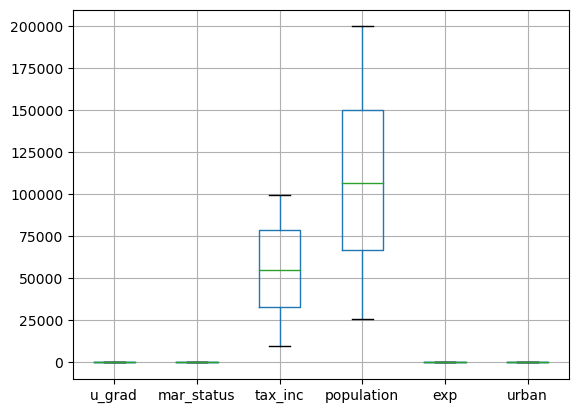

In [15]:
df.boxplot()

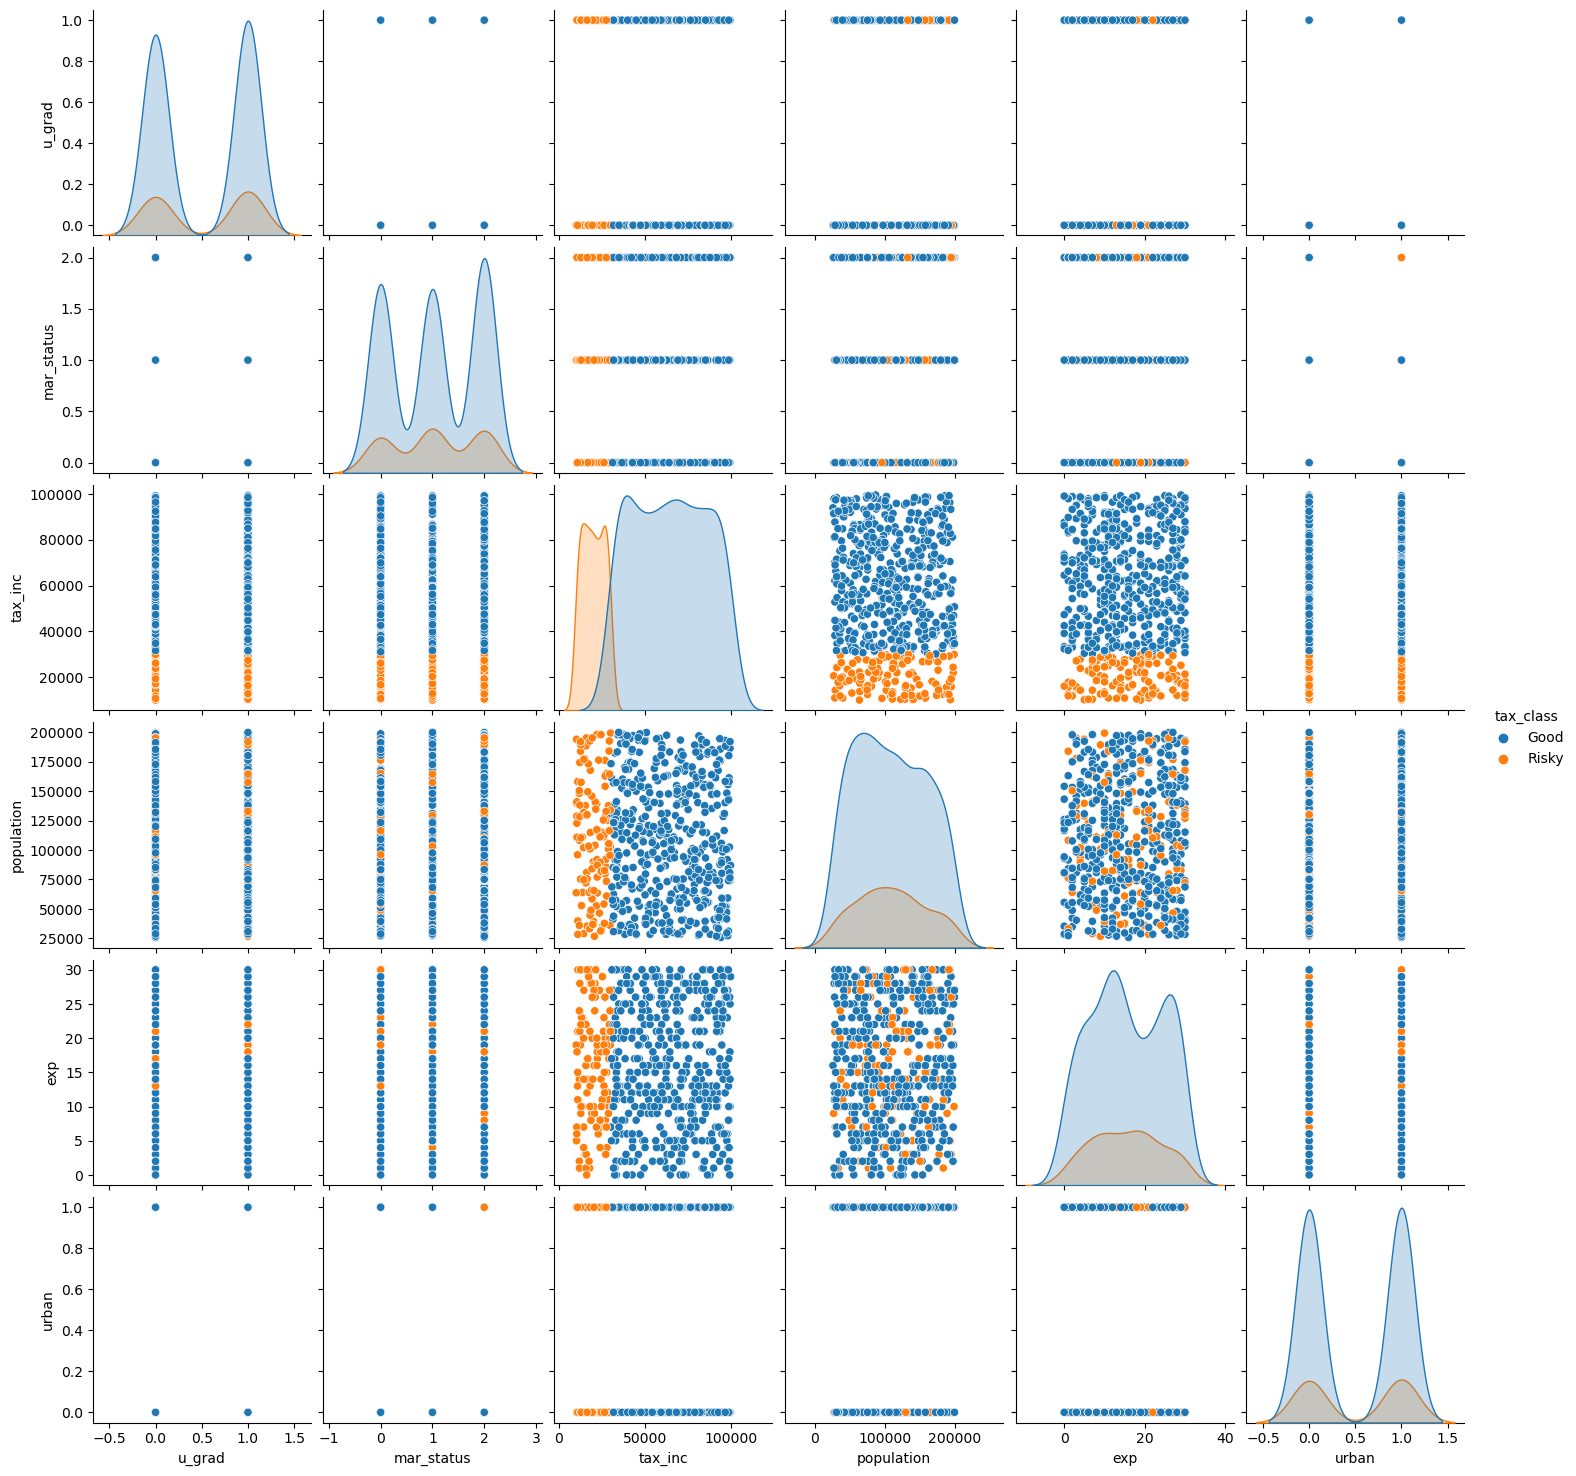

In [16]:
sns.pairplot(df, hue ='tax_class')
plt.show()

In [17]:
desired_columns = ['tax_inc', 'u_grad', 'mar_status','population','exp','urban','tax_class']

df = df.reindex(columns=desired_columns)

In [18]:
df

,tax_inc,u_grad,mar_status,population,exp,urban,tax_class
0,68833,0,2,50047,10,1,Good
1,33700,1,0,134075,18,1,Good
2,36925,0,1,160205,30,1,Good
3,50190,1,2,193264,15,1,Good
4,81002,0,1,27533,28,0,Good
...,...,...,...,...,...,...,...
595,76340,1,0,39492,7,1,Good
596,69967,1,0,55369,2,1,Good
597,47334,0,0,154058,0,1,Good
598,98592,1,1,180083,17,0,Good


In [19]:
x = df.iloc[:,1:6]
y = df['tax_class']

In [20]:
x

,u_grad,mar_status,population,exp,urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [21]:
y

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: tax_class, Length: 600, dtype: object

In [22]:
#Splitting data into train & test part                  
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.33,random_state=40)

                                Random Forest Classifier

In [23]:
kfold = KFold(n_splits=10)

In [24]:
num_trees = 100
max_features = 3
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
model.fit(x_train, y_train)

RandomForestClassifier(max_features=3)

In [25]:
preds = model.predict(x_test)
preds

array(['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good',
       'Risky', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Risky', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Risky', 'Good', 'Risky', 'Good', 'Good

In [26]:
val =preds==y_test
val

159     True
307     True
253     True
528     True
137    False
       ...  
78      True
380     True
199    False
101     True
438    False
Name: tax_class, Length: 198, dtype: bool

In [27]:
val.value_counts()

True     143
False     55
Name: tax_class, dtype: int64

In [28]:
np.mean(val)

0.7222222222222222

In [29]:
importances = model.feature_importances_
importances

array([0.04243882, 0.07969628, 0.53441739, 0.29026723, 0.05318029])

In [30]:
model.score(x_test, y_test)

0.7222222222222222

In [31]:
results = cross_val_score(model, x, y, cv=kfold)
results

array([0.78333333, 0.76666667, 0.68333333, 0.7       , 0.76666667,
       0.65      , 0.88333333, 0.71666667, 0.76666667, 0.85      ])

In [32]:
print(results.mean())

0.7566666666666666


                      Building Random Forest Regressor 

In [41]:
df

,tax_inc,u_grad,mar_status,population,exp,urban,tax_class
0,68833,0,2,50047,10,1,Good
1,33700,1,0,134075,18,1,Good
2,36925,0,1,160205,30,1,Good
3,50190,1,2,193264,15,1,Good
4,81002,0,1,27533,28,0,Good
...,...,...,...,...,...,...,...
595,76340,1,0,39492,7,1,Good
596,69967,1,0,55369,2,1,Good
597,47334,0,0,154058,0,1,Good
598,98592,1,1,180083,17,0,Good


In [42]:
x = df.iloc[:,1:6]
y = df['tax_inc']

In [43]:
y

0      68833
1      33700
2      36925
3      50190
4      81002
       ...  
595    76340
596    69967
597    47334
598    98592
599    96519
Name: tax_inc, Length: 600, dtype: int64

In [44]:
#Splitting data into train & test part                  
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.33,random_state=40)

In [45]:
from sklearn.ensemble import RandomForestRegressor
model_reg = RandomForestRegressor(n_estimators=num_trees, max_features=max_features)
model_reg.fit(x_train,y_train)

RandomForestRegressor(max_features=3)

In [46]:
pred_reg = model_reg.predict(x_test)
pred_reg

array([59757.52, 57638.32, 66148.69, 41503.48, 47596.71, 56443.36,
       57743.91, 47342.57, 71574.83, 45958.62, 48458.53, 58863.22,
       61120.94, 51105.53, 39148.96, 67717.7 , 52719.9 , 44474.68,
       53311.95, 30536.12, 41964.46, 53117.28, 47972.73, 47946.  ,
       38042.23, 61852.08, 51726.28, 50820.71, 62773.98, 62155.48,
       49236.44, 41568.82, 70085.29, 42858.86, 54668.25, 78118.71,
       73557.65, 64859.75, 57887.9 , 59052.26, 64583.54, 72381.74,
       81898.55, 73964.45, 58701.75, 65927.37, 46482.9 , 70173.71,
       62693.82, 51575.4 , 53882.5 , 48525.51, 56464.36, 50665.83,
       56067.91, 55092.59, 57497.45, 47210.82, 51611.57, 54107.03,
       57046.21, 65255.94, 48953.74, 57455.81, 73667.25, 39581.71,
       58896.32, 54014.06, 62614.74, 49724.56, 49169.77, 50239.34,
       58747.19, 65495.13, 67871.51, 39667.44, 50917.1 , 74993.37,
       56436.81, 42165.54, 54414.7 , 38187.12, 36882.93, 60274.17,
       59221.94, 48527.15, 57351.15, 64265.39, 55168.18, 50106

In [47]:
pd.Series(pred_reg).value_counts()

59757.52    1
49144.90    1
69014.11    1
63694.03    1
66191.99    1
           ..
62614.74    1
49724.56    1
49169.77    1
50239.34    1
74503.63    1
Length: 198, dtype: int64

In [48]:
pd.DataFrame({'Actual' : y_test,
             'Predicted':pred_reg})

,Actual,Predicted
159,62209,59757.52
307,62873,57638.32
253,79869,66148.69
528,91488,41503.48
137,22773,47596.71
...,...,...
78,73411,57167.68
380,36156,39512.01
199,19060,71377.13
101,35072,51457.12


In [49]:
model_reg.score(x_train,y_train)

0.8356543885068758